<h1> Installing and Importing Python Libraries <h1>

In [534]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import statsmodels.api as sm
import folium 

In [535]:
from sklearn.feature_selection import mutual_info_regression
from folium.plugins import FastMarkerCluster
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import StackingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import VarianceThreshold
from sklearn import preprocessing
from sklearn.linear_model import Lasso
from statsmodels.stats.outliers_influence import variance_inflation_factor


%matplotlib inline

<h2> Loading the csv dataset <h2>

In [536]:
#Load the data
airbnb = pd.read_csv('/Users/da_m1_52/Downloads/airBNB.csv')

In [537]:
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


<h2>EDA - We did data cleaning to our dataset to get the best out of it , so we can fit it into to a machine learning model<h2>

In [538]:
#Checking datatypes in our Dataset
airbnb.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [539]:
#Checking for Nulls in our Dataset
null_counts = airbnb.isnull().sum()
print(null_counts)

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [540]:
#Checking for duplicates in our Dataset
duplicates = airbnb.duplicated().sum()
duplicates

0

In [541]:
#Imputing by median in the 'reviews_per_month' column 
median_reviews_per_month = airbnb['reviews_per_month'].median()
airbnb['reviews_per_month'].fillna(median_reviews_per_month, inplace=True)

In [542]:
#We used Forward Fill to fill in empty dates for our 'last_review' column 
airbnb['last_review'] = airbnb['last_review'].fillna(method='ffill') 

In [543]:
#We droppped the empty rows in 'name' and 'host_name'
AirBnB_Clean = airbnb.dropna(subset=['name', 'host_name'], inplace=True)

In [544]:
#Extraction of 'Days of the week', 'Month', 'Year' and 'Seasons'
airbnb['DayOfWeek'] = pd.to_datetime(airbnb['last_review']).dt.day 
airbnb['Month'] = pd.to_datetime(airbnb['last_review']).dt.month_name()
airbnb['Year'] = pd.to_datetime(airbnb['last_review']).dt.year

def get_season(month):
    if month in ['December', 'January', 'February']:
        return 'Winter'
    elif month in ['March', 'April', 'May']:
        return 'Spring'
    elif month in ['June', 'July', 'August']:
        return 'Summer'
    else:
        return 'Fall'

airbnb['Seasons'] = airbnb['Month'].apply(get_season)


<h2> STATISTICS AND ANALYSIS <h2>


### feature selection, check linearity, multi collinearity, check for distribution, check skewness, check kurtosis, outliers, variance threshold, chi2, correlation 

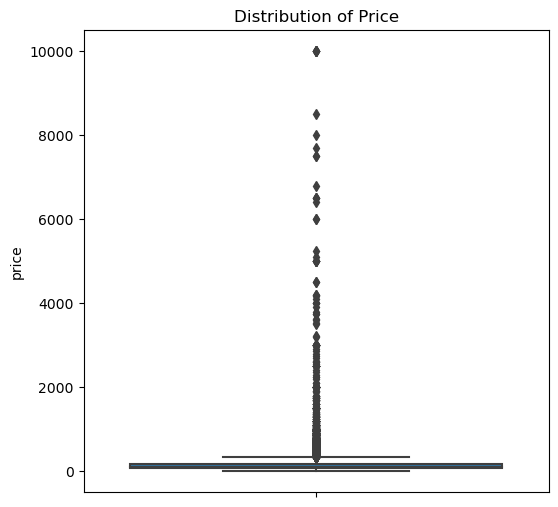

In [545]:
plt.figure(figsize=(6,6))
sns.boxplot(y=airbnb['price'])
plt.title("Distribution of Price")
plt.show()

In [546]:
Q1 = airbnb['price'].quantile(0.25)
Q3 = airbnb['price'].quantile(0.75)
IQR = Q3 - Q1

print("Interquartile Range (IQR):", IQR)

Interquartile Range (IQR): 106.0


####We checked for the outliers in the price distribution and for prices for each neighborhood group and we aslo checked the IQR for skewness of the distribution

Text(0, 0.5, 'Price')

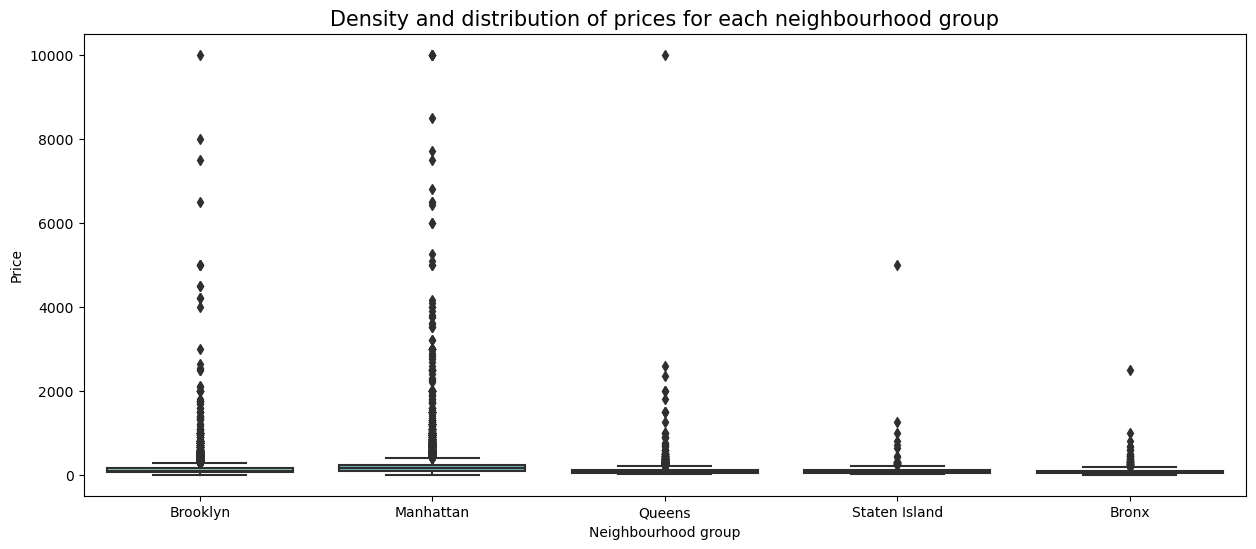

In [547]:
plt.figure(figsize=(15,6))
sns.boxplot(data=airbnb, x='neighbourhood_group', y='price', palette='GnBu_d')
plt.title('Density and distribution of prices for each neighbourhood group', fontsize=15)
plt.xlabel('Neighbourhood group')
plt.ylabel("Price")

/var/folders/5g/55_x_kdn3fx9kqydvjsl9qwr0000gn/T/ipykernel_96094/305884002.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(airbnb['price'], kde=False)


Text(0.5, 1.0, 'Distribution of price')

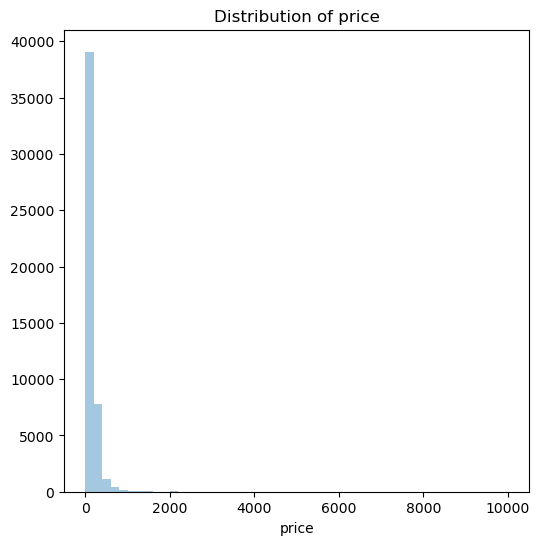

In [548]:
plt.figure(figsize=(6, 6))
sns.distplot(airbnb['price'], kde=False)
plt.title('Distribution of price')

In [549]:
#We used a log transformation to achieve normality within the distribution of price
airbnb['price'] = np.log(airbnb['price'])
airbnb['price'] = airbnb['price'].replace([np.inf, -np.inf], np.nan)
airbnb['price'] = airbnb['price'].fillna(airbnb['price'].mean())


/Users/da_m1_52/anaconda3/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


/var/folders/5g/55_x_kdn3fx9kqydvjsl9qwr0000gn/T/ipykernel_96094/2939776366.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(airbnb['price'], kde=False)


Text(0.5, 1.0, 'Distribution of price')

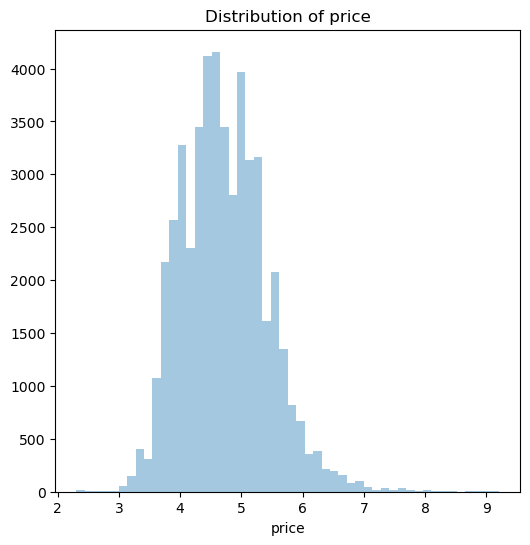

In [550]:
#This is the result of the log price transformation 
plt.figure(figsize=(6, 6))
sns.distplot(airbnb['price'], kde=False)
plt.title('Distribution of price')

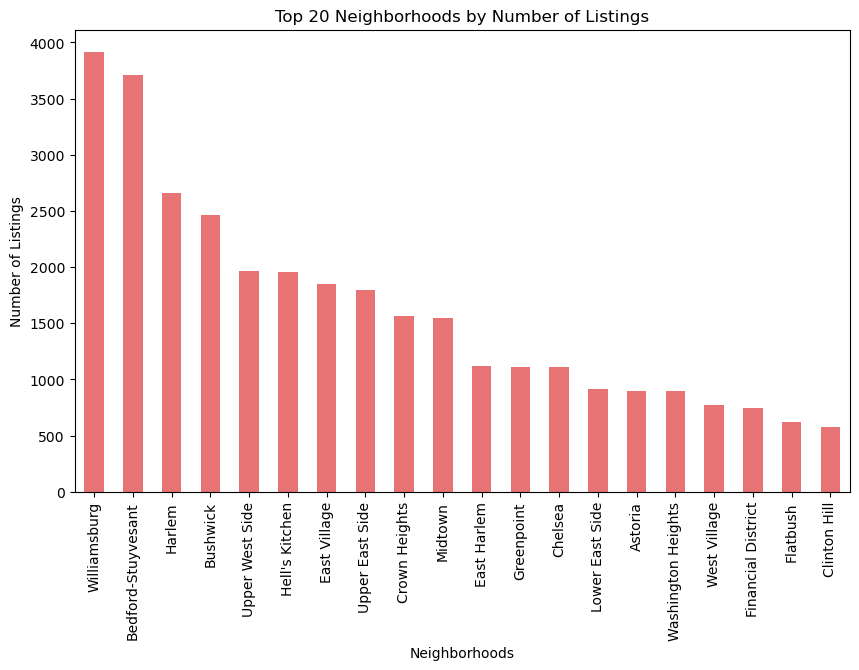

Number of Neighborhoods: 221


In [551]:
#The top 20 Neighbourhoods
count_per_neighborhood = airbnb['neighbourhood'].value_counts()
top_20_neighborhoods = count_per_neighborhood.head(20)
ax = top_20_neighborhoods.plot(kind='bar', figsize=(10, 6), color='#E35A5C', alpha=0.85)
ax.set_title("Top 20 Neighborhoods by Number of Listings")
ax.set_xlabel("Neighborhoods")
ax.set_ylabel("Number of Listings")
plt.show()
print("Number of Neighborhoods:", len(count_per_neighborhood))

Text(0.5, 1.0, 'Percentage in Each Neigbourhood')

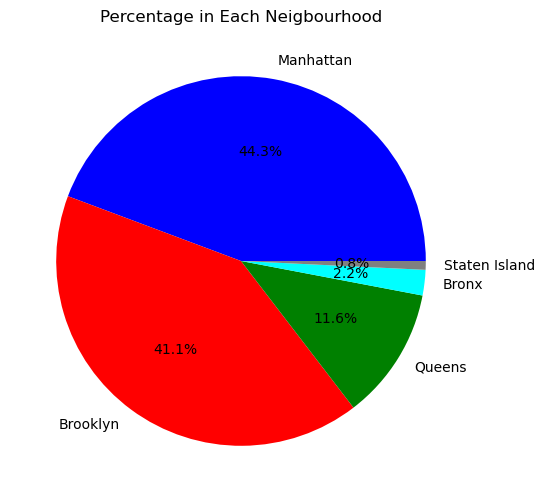

In [552]:
#distribution of Each Neighbourhood group
plt.figure(figsize=(6,6))
numbers = airbnb['neighbourhood_group'].value_counts()
plt.pie(numbers.values, labels=numbers.index, colors=['b', 'r', 'g', 'cyan', 'gray'], autopct='%1.1f%%')
plt.title('Percentage in Each Neigbourhood')

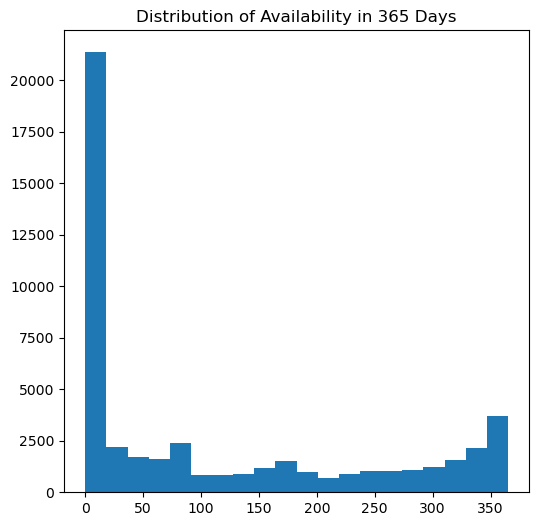

In [553]:
#Distribution of the Availability in 365 Days 
plt.figure(figsize=(6,6))
plt.hist(airbnb['availability_365'], bins=20)
plt.title("Distribution of Availability in 365 Days")
plt.show()

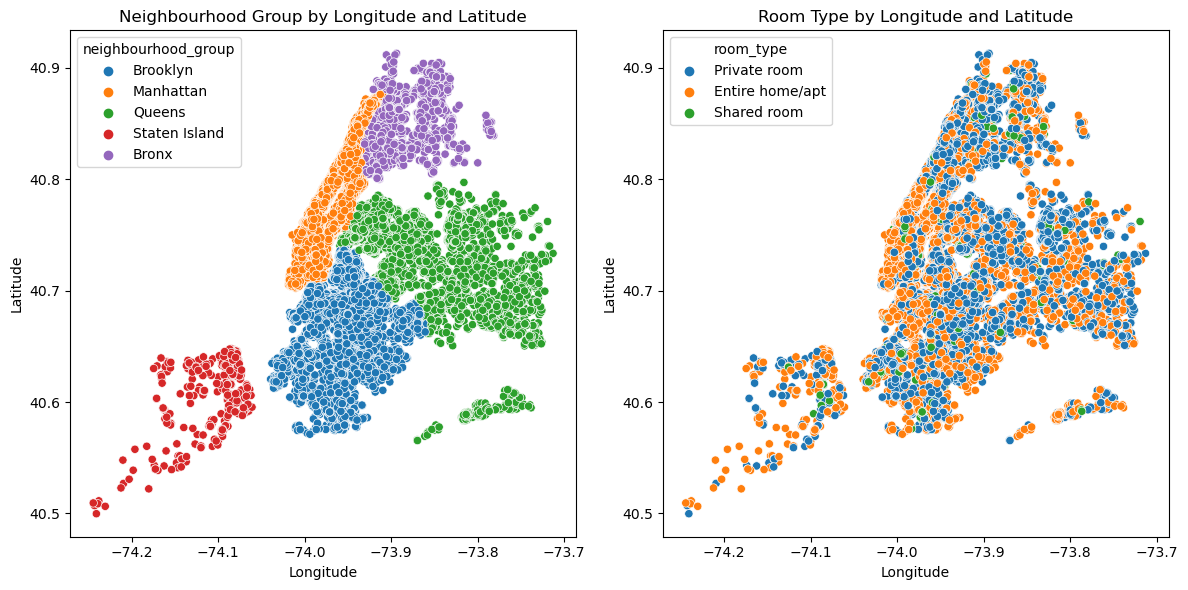

In [554]:
# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
sns.scatterplot(x=airbnb['longitude'], y=airbnb['latitude'], hue=airbnb['neighbourhood_group'], ax=axs[0])
axs[0].set_title('Neighbourhood Group by Longitude and Latitude' )
axs[0].set_xlabel('Longitude')
axs[0].set_ylabel('Latitude')
sns.scatterplot(x=airbnb['longitude'], y=airbnb['latitude'], hue=airbnb['room_type'], ax=axs[1])
axs[1].set_title('Room Type by Longitude and Latitude')
axs[1].set_xlabel('Longitude')
axs[1].set_ylabel('Latitude')
plt.tight_layout()
plt.show()

In [555]:
# kurtosis
print ("skewness: %f" % airbnb['price'].skew())
print( "kurtosis: %f" % airbnb['price'].kurt())

skewness: 0.608577
kurtosis: 1.304079


We found out that we have a high kurtosis and skewnesss , we log transformed our price to reduce the kurtosis and skewness , to bring normality.

In [556]:
#Analyze the data
airbnb.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,DayOfWeek,Year
count,4.885800e+04,4.885800e+04,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000
mean,1.902335e+07,6.763169e+07,40.728941,-73.952170,4.727106,7.012444,23.273098,1.239035,7.148369,112.801425,15.650129,2018.317655
std,1.098289e+07,7.862389e+07,0.054528,0.046159,0.698170,20.019757,44.549898,1.520889,32.964600,131.610962,9.918739,1.161693
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,2.302585,1.000000,0.000000,0.010000,1.000000,0.000000,1.000000,2011.000000
25%,9.475980e+06,7.818669e+06,40.690090,-73.983070,4.234107,1.000000,1.000000,0.280000,1.000000,0.000000,6.000000,2018.000000
50%,1.969114e+07,3.079133e+07,40.723070,-73.955680,4.663439,3.000000,5.000000,0.720000,1.000000,45.000000,16.000000,2019.000000
75%,2.915765e+07,1.074344e+08,40.763107,-73.936280,5.164786,5.000000,24.000000,1.580000,2.000000,227.000000,24.000000,2019.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,9.210340,1250.000000,629.000000,58.500000,327.000000,365.000000,31.000000,2019.000000


#The highest price we have for a room is $10000.00, mean price is $152.74 and lowest price is $0.00. 

/var/folders/5g/55_x_kdn3fx9kqydvjsl9qwr0000gn/T/ipykernel_96094/4083743258.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = subset_df.corr()


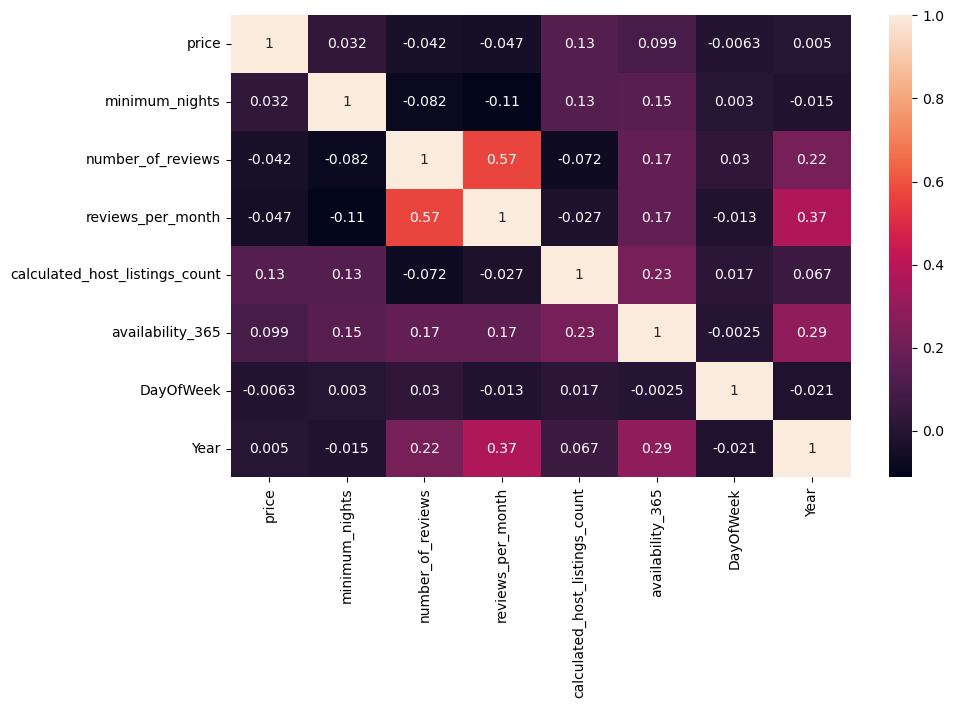

In [557]:
#This is our correlation heatmap
selected_columns = ['name', 'host_name','neighbourhood_group','neighbourhood','price','minimum_nights','number_of_reviews', 'reviews_per_month','calculated_host_listings_count','Month','availability_365','DayOfWeek','Seasons','Year']
subset_df = airbnb[selected_columns]
cor = subset_df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(cor, annot=True)
plt.show()

In [ ]:
#This is is our correlation of price compared to other columns
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = airbnb.select_dtypes(include=numerics)
nrows = int(len(newdf.columns) / 3) + 1
fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(24, 6*nrows))
fig.subplots_adjust(hspace=0.5)

for ax, name in zip(axes.flatten(), newdf.columns):

  sns.regplot(x=name, y='price', data=newdf, ax=ax)
  ax.set_title(f"Correlation between {name} and the price")

plt.show()

In [ ]:
latitudes = np.array(airbnb['latitude'])
longitudes = np.array(airbnb['longitude'])
la_mean = latitudes.mean()
lo_mean = longitudes.mean()
locations = list(zip(latitudes, longitudes))

m = folium.Map(location=[la_mean, lo_mean], zoom_start= 11.5)
FastMarkerCluster(data=locations).add_to(m)
m

#### FEATURE SELECTION


###### 1. Selecting features using VIF METHOD,variance_inflation_factor, VarianceThreshold, Feature importance, Feature Emptiness

In [ ]:
subset_df = airbnb[['id','host_id','latitude','longitude', 'price','minimum_nights', 'number_of_reviews' , 'reviews_per_month', 'calculated_host_listings_count','availability_365']]


# Calculate the VIF for each variable
vif = pd.DataFrame()
vif["Variable"] = subset_df.columns
vif["VIF"] = [variance_inflation_factor(subset_df.values, i) for i in range(subset_df.shape[1])]

# Print the VIF values
print(vif)

In [ ]:
selected_columns = ['price','minimum_nights','number_of_reviews', 'reviews_per_month','calculated_host_listings_count', 'availability_365', 'DayOfWeek']
X =airbnb[selected_columns] 
v_threshold = VarianceThreshold(threshold=0.5)
v_threshold.fit(X)
selected_features = v_threshold.get_support()

selected_features

array([False,  True,  True,  True,  True,  True,  True])

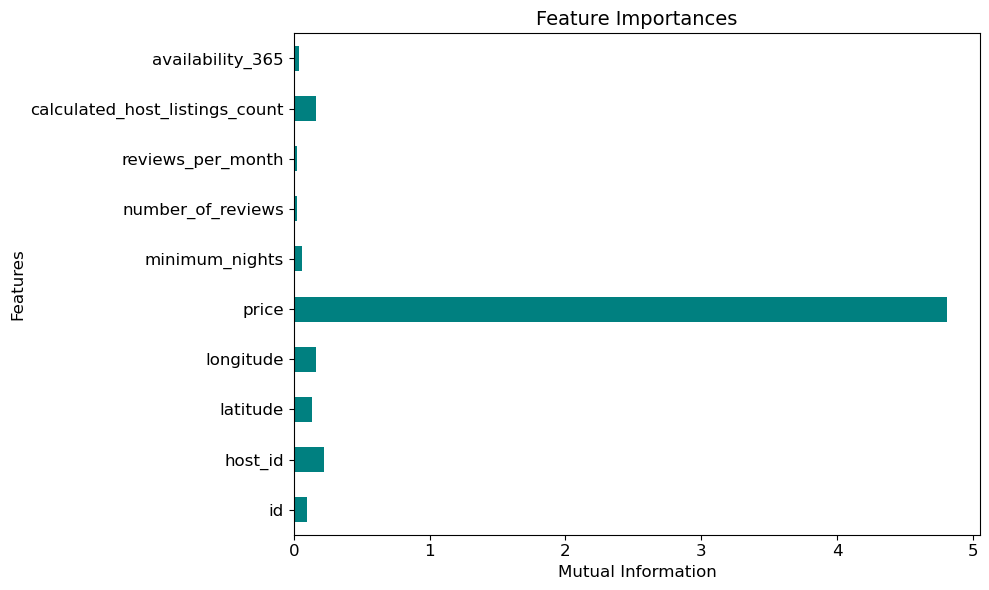

In [559]:
Y = airbnb['price']
X = pd.get_dummies(airbnb[['id','host_id' ,'latitude','longitude', 'price','minimum_nights', 'number_of_reviews' , 'reviews_per_month', 'calculated_host_listings_count','availability_365']])
importances = mutual_info_regression(X, Y)
feat_importances = pd.Series(importances, index=X.columns)
plt.figure(figsize=(10, 6))
feat_importances.plot(kind='barh', color='teal', fontsize=12)
plt.xlabel('Mutual Information', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Feature Importances', fontsize=14)
plt.subplots_adjust(left=0.3)
plt.tight_layout()
plt.show()


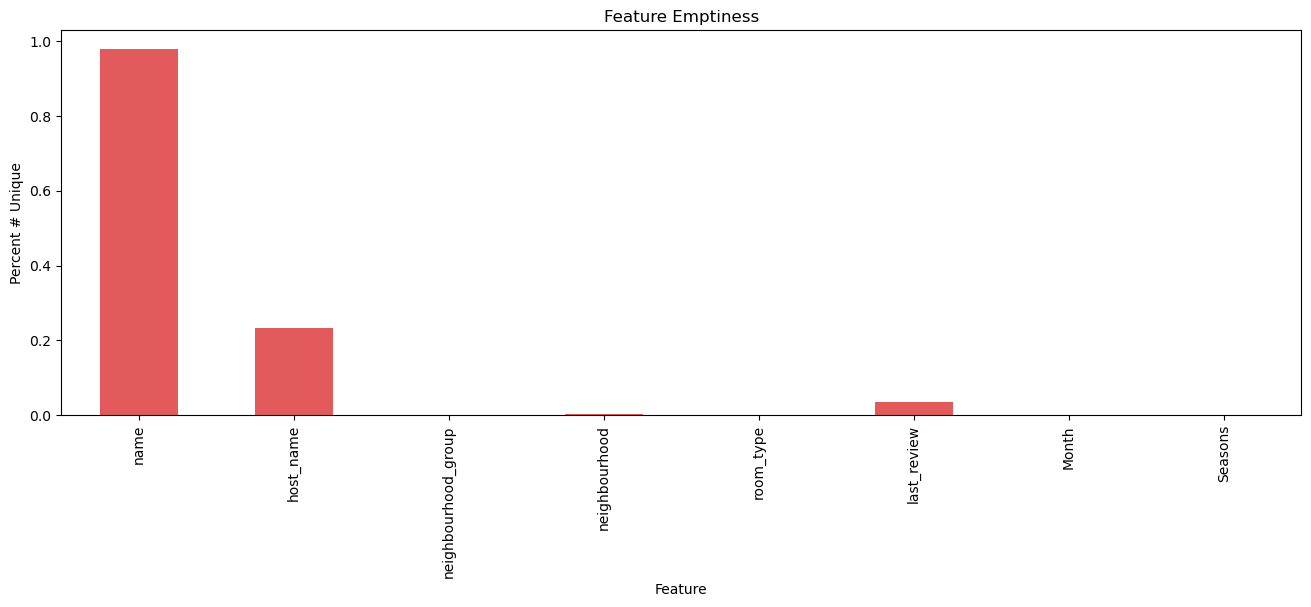

In [ ]:
#Selection on Sparse Categorical Features
#Let's have a look at the categorical data to see the number of unique values
categories = airbnb.columns[airbnb.dtypes == 'object']
percentage_unique = airbnb[categories].nunique() / airbnb.shape[0]

ax = percentage_unique.plot(kind = 'bar', color='#E35A5C', figsize = (16, 5))
ax.set_xlabel('Feature')
ax.set_ylabel('Percent # Unique')
ax.set_title('Feature Emptiness')
plt.show()

MACHINE LEARNING - MODEL BUILDING

train/test split, data scaling(standard scaler), fit the model, predict, assess the model(MAE, RSquared,RSME), try other models such as desicion tree, random forest, Lasso.

STANDARDIZE -  We standardized so that our data could be in the same ranges, in-order to feed it to our machine learning model.

In [560]:
#LabelEncoder to be able feed the model 
le = LabelEncoder()
le.fit(airbnb["room_type"])
airbnb["room_type"] = le.transform(airbnb["room_type"])
le = LabelEncoder()
le.fit(airbnb["Seasons"])
airbnb["Seasons"] = le.transform(airbnb["Seasons"])
le = LabelEncoder()
le.fit(airbnb["Month"])
airbnb["Month"] = le.transform(airbnb["Month"])
le = LabelEncoder()
le.fit(airbnb["neighbourhood"])
airbnb["neighbourhood"] = le.transform(airbnb["neighbourhood"])

le = LabelEncoder()
le.fit(airbnb["DayOfWeek"])
airbnb["DayOfWeek"] = le.transform(airbnb["DayOfWeek"])

le = LabelEncoder()
le.fit(airbnb["host_name"])
airbnb["host_name"] = le.transform(airbnb["host_name"])

le = LabelEncoder()
le.fit(airbnb["neighbourhood_group"])
airbnb["neighbourhood_group"] = le.transform(airbnb["neighbourhood_group"])

le = LabelEncoder()
le.fit(airbnb["name"])
airbnb["name"] = le.transform(airbnb["name"])

le = LabelEncoder()
le.fit(airbnb["last_review"])
airbnb["last_review"] = le.transform(airbnb["last_review"])



In [561]:
airbnb

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,DayOfWeek,Month,Year,Seasons
0,2539,12321,2787,4988,1,108,40.64749,-73.97237,1,5.003946,1,9,1501,0.21,6,365,18,10,2018,0
1,2595,37440,2845,4784,2,127,40.75362,-73.98377,0,5.416100,1,45,1715,0.38,2,355,20,8,2019,1
2,3647,43522,4632,2909,2,94,40.80902,-73.94190,1,5.010635,3,0,1715,0.72,1,365,20,8,2019,1
3,3831,14776,4869,6202,1,41,40.68514,-73.95976,0,4.488636,1,270,1760,4.64,1,194,4,5,2019,2
4,5022,18684,7192,5922,2,61,40.79851,-73.94399,0,4.382027,10,9,1532,0.10,1,0,18,9,2018,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,11640,8232441,9049,1,13,40.67853,-73.94995,1,4.248495,2,0,1763,0.72,2,9,7,5,2019,2
48891,36485057,3518,6570630,6775,1,28,40.70184,-73.93317,1,3.688879,4,0,1763,0.72,2,36,7,5,2019,2
48892,36485431,42446,23492952,4262,2,94,40.81475,-73.94867,0,4.744932,10,0,1763,0.72,1,27,7,5,2019,2
48893,36485609,2570,30985759,10188,2,95,40.75751,-73.99112,2,4.007333,1,0,1763,0.72,6,2,7,5,2019,2


In [568]:
#These are the features we selected , in-order to be able to predict the price 
features = ['id','name','host_id','host_name','neighbourhood_group','neighbourhood','latitude','longitude','room_type','minimum_nights',
            'number_of_reviews','last_review','reviews_per_month','availability_365','DayOfWeek','Year','Seasons']

target = 'price'
X = airbnb[features]
Y =airbnb[target]

scale = StandardScaler()
scaledX = scale.fit_transform(X)

print(scaledX)

[[-1.73187561 -0.84238516 -0.86016597 ...  0.337735   -0.2734445
  -2.10572561]
 [-1.73187051  0.97718352 -0.86016523 ...  0.5393756   0.58737711
  -0.88555006]
 [-1.73177473  1.41775109 -0.8601425  ...  0.5393756   0.58737711
  -0.88555006]
 ...
 [ 1.58995073  1.33980786 -0.56139665 ... -0.77128828  0.58737711
   0.33462549]
 [ 1.58996694 -1.54872754 -0.46609631 ... -0.77128828  0.58737711
   0.33462549]
 [ 1.5901159   1.48982684  0.00620843 ... -0.77128828  0.58737711
   0.33462549]]


In [569]:
#Split the data into a training set of 25% and a test set of 75%
X_train, X_test, y_train, y_test = train_test_split(scaledX,Y, test_size=0.2)

In [570]:
#These are the models ,we will use for our features 
dt = DecisionTreeRegressor(random_state=0)
rf = RandomForestRegressor(n_estimators=100,random_state=0)
lasso = Lasso(alpha=1.0)
RidgeR = ridge = Ridge(alpha=1.0)
LinearR = lr = LinearRegression()
Adab = adaboost = AdaBoostRegressor()
model1 = LinearRegression()
model2 = DecisionTreeRegressor()
# StackingR = stacking_reg = StackingRegressor(estimators=[('lr', model1), ('dt', model2)]) 



listr = [dt, rf, lasso,RidgeR,LinearR,Adab]

# MODEL ASSESSMENT 

In [571]:
all_models = []
for i in listr:
    i.fit(X_train, y_train)
    test_y_pred = i.predict(X_test)
    train_y_pred = i.predict(X_train)
    
    train_r2 = r2_score(y_train, train_y_pred)
    train_mse = mean_squared_error(y_train, train_y_pred)
    train_mae = mean_absolute_error(y_train, train_y_pred)
    train_rmse = mean_squared_error(y_train, train_y_pred, squared=False)
    
    test_r2 = r2_score(y_test, test_y_pred)
    test_mse = mean_squared_error(y_test, test_y_pred)
    test_mae = mean_absolute_error(y_test, test_y_pred)
    test_rmse = mean_squared_error(y_test, test_y_pred, squared=False)
    
    Machine_Learning_Model = ['R2-train','R2-test','MSE-train','MSE-test','RSME-train','RSME-test','MAE-train','MAE-test']
    Model = [train_r2, test_r2,train_mse, test_mse,train_rmse,test_rmse, train_mae, test_mae],
    all_models.append(Model)
    
dtr = all_models[0][0]
rfr = all_models[1][0]
lassor = all_models[2][0]
RidgeR = all_models[3][0]
LinearR = all_models[4][0]
Adab = all_models[5][0]
# StackingR =  all_models[6][0]

In [572]:
destree = pd.DataFrame(dtr, index =['R2-train','R2-test','MSE-train','MSE-test','RSME-train','RSME-test','MAE-train','MAE-test'],   columns =['Decision Tree'])
ranforest = pd.DataFrame(rfr, index =['R2-train','R2-test','MSE-train','MSE-test','RSME-train','RSME-test','MAE-train','MAE-test'],   columns =['Random forest'])
lassoc = pd.DataFrame(lassor, index =['R2-train','R2-test','MSE-train','MSE-test','RSME-train','RSME-test','MAE-train','MAE-test'],   columns =['Lasso'])
Ridgereg = pd.DataFrame(RidgeR, index =['R2-train','R2-test','MSE-train','MSE-test','RSME-train','RSME-test','MAE-train','MAE-test'],   columns =['Ridge'])
linearR = pd.DataFrame(LinearR, index =['R2-train','R2-test','MSE-train','MSE-test','RSME-train','RSME-test','MAE-train','MAE-test'],   columns =['Linear Regression'])
Adaboost = pd.DataFrame(Adab, index =['R2-train','R2-test','MSE-train','MSE-test','RSME-train','RSME-test','MAE-train','MAE-test'],   columns =['Adaboost Regression'])
# StackingRegressor = pd.DataFrame(StackingR, index =['R2-train','R2-test','MSE-train','MSE-test','RSME-train','RSME-test','MAE-train','MAE-test'],   columns =['Stacking Regression'])

In [573]:
dfs = [destree, ranforest, lassoc, Ridgereg, linearR, Adaboost]

# Merge the DataFrames
merged_df = pd.concat(dfs, axis=1)
merged_df

,Decision Tree,Random forest,Lasso,Ridge,Linear Regression,Adaboost Regression
R2-train,1.000000e+00,0.945126,0.000000,0.460281,0.460281,0.217824
R2-test,2.201154e-01,0.627328,-0.000058,0.472869,0.472869,0.206400
MSE-train,1.705438e-33,0.026921,0.490594,0.264783,0.264783,0.383731
MSE-test,3.702576e-01,0.176930,0.474787,0.250260,0.250260,0.376769
RSME-train,4.129695e-17,0.164076,0.700424,0.514570,0.514570,0.619460
RSME-test,6.084880e-01,0.420630,0.689048,0.500260,0.500260,0.613815
MAE-train,2.454159e-18,0.115168,0.554129,0.371047,0.371047,0.486391
MAE-test,4.332685e-01,0.305549,0.551013,0.369790,0.369790,0.485096


In [575]:
import pickle

model_save_path = "AirbnbDT.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(dtr,file)
    
model_save_path = "AirbnbRF.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(rfr,file)
    
model_save_path = "AirbnbL.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(lassor,file)
    
model_save_path = "AirbnbR.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(RidgeR,file)
    
model_save_path = "AirbnbLR.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(linearR,file)
    
model_save_path = "AirbnbAR.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(Adaboost,file)

In [ ]:
model_save_path = "AirbnbRF.pkl"
with open(model_save_path, 'rb') as file:
    model = pickle.load(file)

print(model)